<a href="https://colab.research.google.com/github/JBxss/Data-Analysis/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Patrones de compra.xlsx')
df.head()

,Persona,Edad,Género,Estado civil,Ingreso anual,Compras en línea (en los últimos 3 meses),Monto promedio por compra,Categoría de producto principal
0,1,32,F,Soltera,32000,5,50,Ropa
1,2,45,M,Casado,70000,2,120,Electrónica
2,3,27,M,Soltero,25000,1,15,Juguetes
3,4,38,F,Casada,80000,3,75,Belleza y cuidado personal
4,5,55,M,Casado,95000,0,0,NaN


In [ ]:
#Normalizamos datos
map_gen = {'M':0,'H':0,'Hombre':0,'F':1,'Mujer':1}
df['Género'] = df['Género'].map(map_gen)


map_est = {'Soltero':0,'Soltera':0,'Casado':1,'Casada':1,'Viuda':2,'Viudo':2,'Divorciado':0.9,'Divorciada':0.9}
df['Estado civil'] = df['Estado civil'].map(map_est)


valor_max_edad = df['Edad'].max()
valor_min_edad = df['Edad'].min()
df['Edad'] = (df['Edad'] - valor_min_edad) / (valor_max_edad - valor_min_edad)


valor_max_ingreso = df['Ingreso anual'].max()
valor_min_ingreso = df['Ingreso anual'].min()
df['Ingreso anual'] = (df['Ingreso anual'] - valor_min_ingreso) / (valor_max_ingreso - valor_min_ingreso)


valor_max_compras = df['Compras en línea (en los últimos 3 meses)'].max()
valor_min_compras = df['Compras en línea (en los últimos 3 meses)'].min()
df['Compras en línea (en los últimos 3 meses)'] = (df['Compras en línea (en los últimos 3 meses)'] - valor_min_compras) / (valor_max_compras - valor_min_compras)


valor_max_monto = df['Monto promedio por compra'].max()
valor_min_monto = df['Monto promedio por compra'].min()
df['Monto promedio por compra'] = (df['Monto promedio por compra'] - valor_min_monto) / (valor_max_monto - valor_min_monto)

df = pd.get_dummies(df, columns=['Categoría de producto principal'], prefix='', prefix_sep='')

df.head()

,Persona,Edad,Género,Estado civil,Ingreso anual,Compras en línea (en los últimos 3 meses),Monto promedio por compra,-,Alimentos,Belleza,...,Libros,Moda,Moda,Moda y accesorios,Muebles y decoración,Muebles y hogar,Ropa,Ropa y accesorios,Ropa y moda,Tecnología
0,1,0.285714,1,0.0,0.181818,0.20,0.0050,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.551020,0,1.0,0.469697,0.08,0.0120,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.183673,0,0.0,0.128788,0.04,0.0015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.408163,1,1.0,0.545455,0.12,0.0075,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.755102,0,1.0,0.659091,0.00,0.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Definimos variables importantes para el SOM
tan_x = 10
tan_y = 10

pesos = np.random.rand(tan_x, tan_y, df.shape[1])

num_epocas = 100
alpha = 0.1
radio = 50/2

In [ ]:
#Definimos una funcion de vecindad
def vecindad(dist, radio):
  if np.isclose(dist, 0, atol=1e-9).any():
    return np.zeros((tan_x, tan_y, 1))
  else:
    return np.exp(-(dist ** 2) / (2 * (radio ** 2))).reshape(tan_x, tan_y, 1)

#Definir la funcion para encontrar la neurona ganadora
def encontrar_neurona_ganadora(patron):
  distancias = np.sum((patron - pesos) ** 2, axis=2)
  return np.unravel_index(np.argmin(distancias), distancias.shape)

In [ ]:
#Entrenar a la red SOM
for epoca in range(num_epocas):
  alpha = alpha * (np.exp(-(epoca/num_epocas)))
  radio = radio * (np.exp(-(epoca / num_epocas)))
  for i in range(df.shape[0]):
    patron = df.values[i:i+1,:]
    x, y = encontrar_neurona_ganadora(patron)
    d = np.sqrt((np.arange(tan_x) - x) ** 2 + (np.arange(tan_y)[:, np.newaxis] - y) ** 2)
    v = vecindad(d, radio)
    pesos += alpha * v * (patron - pesos)

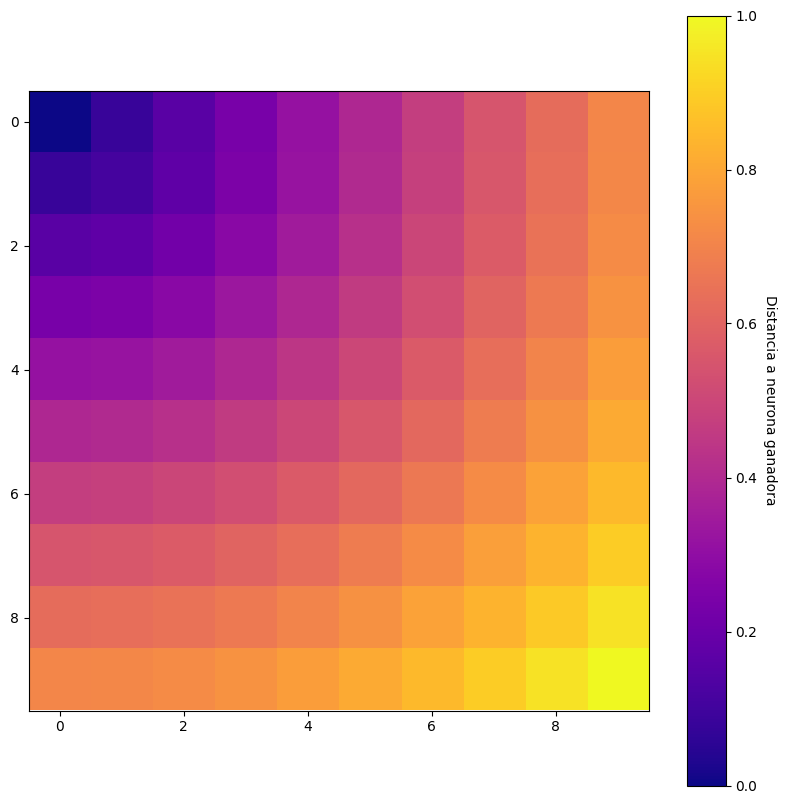

In [ ]:
# Calcular la matriz de distancias para cada neurona en la red
distancias = np.zeros((tan_x, tan_y))
for i in range(df.shape[0]):
    patron = df.values[i:i+1,:]
    x, y = encontrar_neurona_ganadora(patron)
    d = np.sqrt((np.arange(tan_x) - x) ** 2 + (np.arange(tan_y)[:, np.newaxis] - y) ** 2)
    distancias += d

# Normalizar la matriz de distancias en el rango de 0 a 1
distancias = distancias / distancias.max()

# Graficar la matriz de distancias como un mapa de calor
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(distancias, cmap='plasma')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Distancia a neurona ganadora', rotation=-90, va="bottom")
plt.show()